In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv
/kaggle/input/international-football-results-from-1872-to-2017/results.csv
/kaggle/input/fifaworldcup/Fifa_Worldcup_2022_Groups.csv
/kaggle/input/fifaworldranking/fifa_ranking-2022-10-06.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [ ]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.graph_objs as go

In [ ]:
df =  pd.read_csv("../input/international-football-results-from-1872-to-2017/results.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [ ]:
rank = pd.read_csv('../input/fifaworldranking/fifa_ranking-2022-10-06.csv')

rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2020-1-1")].reset_index(drop=True)


In [ ]:
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [ ]:
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
df = df[(df["date"] >= "2020-1-1")].reset_index(drop=True)

In [ ]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2020-01-07,Barbados,Canada,1.0,4.0,Friendly,Irvine,United States,True
1,2020-01-09,Moldova,Sweden,0.0,1.0,Friendly,Doha,Qatar,True
2,2020-01-10,Barbados,Canada,1.0,4.0,Friendly,Irvine,United States,True
3,2020-01-12,Kosovo,Sweden,0.0,1.0,Friendly,Doha,Qatar,True
4,2020-01-15,Canada,Iceland,0.0,1.0,Friendly,Irvine,United States,True


In [ ]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2020-02-20,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
1,2020-02-21,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
2,2020-02-22,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
3,2020-02-23,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
4,2020-02-24,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC


In [ ]:
ranking_df = pd.pivot_table(data = rank,
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
ranking_df.head()

rank_date,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,...,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04
Albania,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,...,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1354.11
Algeria,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,...,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1489.10
American Samoa,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,...,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27
Andorra,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,...,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1035.20


In [ ]:
best_ranks = ranking_df.loc[ranking_df['2022-10-06'].sort_values(ascending = False)[:10].index]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns,
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))

fig.update_layout(
    title="Evolution of the FIFA Ranking for today\'s 10 best teams",
    yaxis_title="Points"
)
fig.show()

Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

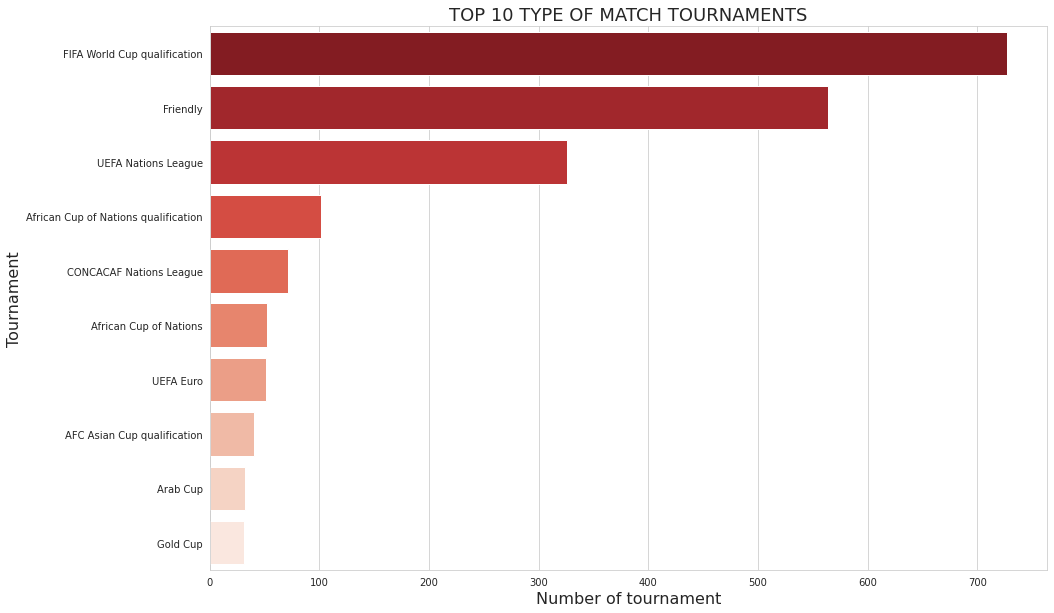

In [ ]:
tournament = df['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

In [ ]:
# create two dataframe for the home and away teams
home = df[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = df[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})
# merge it into one
team_score = home.append(away).reset_index(drop=True)
# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})

Text(0.5, 1.0, 'TOP 10 OF GOAL AVERAGE PER MATCH')

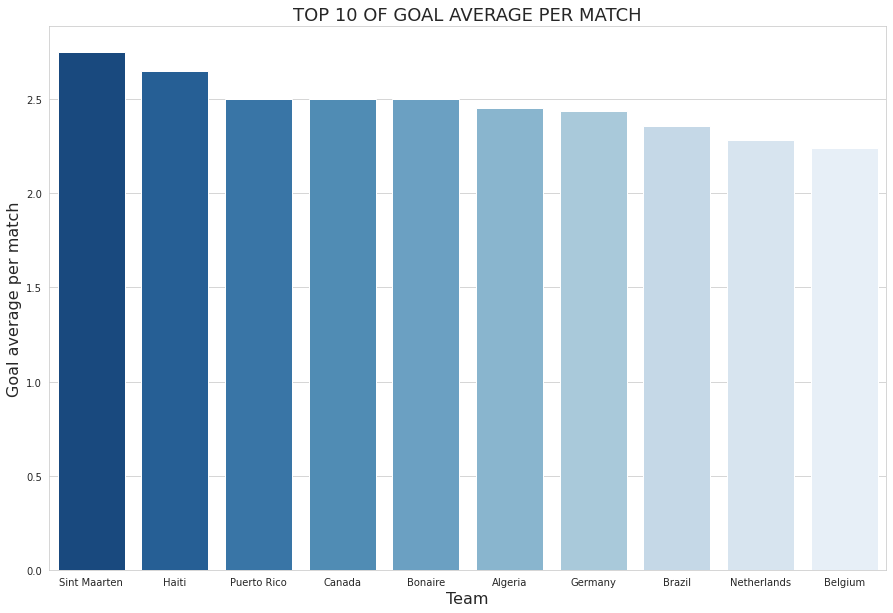

In [ ]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

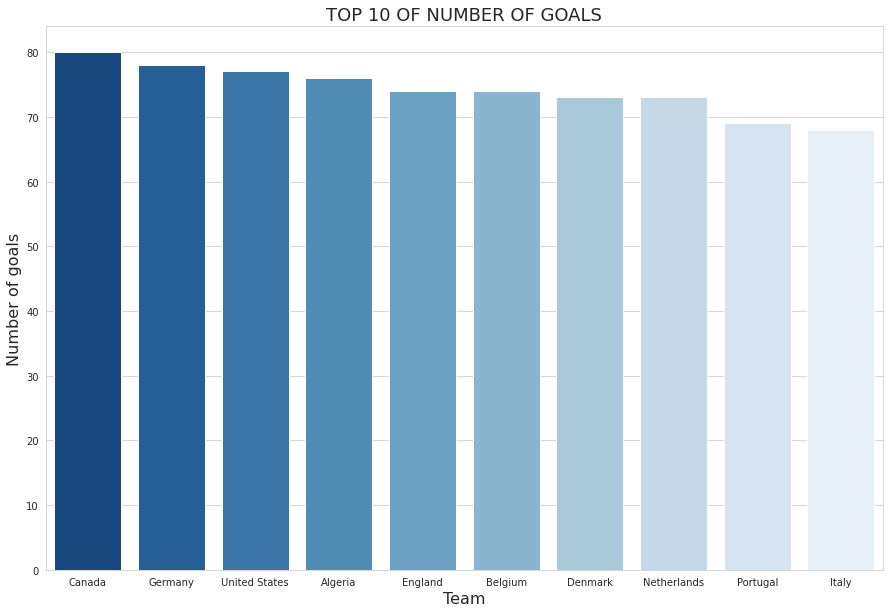

In [ ]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [ ]:
world_cup = pd.read_csv("../input/fifaworldcup/Fifa_Worldcup_2022_Groups.csv")


world_cup.head()


,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales


In [ ]:
world_cup.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [ ]:

world_cup = world_cup.replace({
                               "Korea Republic" : "South Korea","USA": "United States"})
world_cup = world_cup.set_index('Team')
world_cup.head()


,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [ ]:
#Join Ranking with match
df = df.merge(rank,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])
# matches.head()

df = df.merge(rank,
                        left_on=['date', 'away_team'],
                        right_on=['rank_date', 'country_full'], suffixes=('_home', '_away'))
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,2020-09-03,Germany,Spain,1.0,1.0,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,0.0,UEFA,2020-09-03,8.0,Spain,ESP,1636.0,1636.0,0.0,UEFA
1,2020-09-03,Ukraine,Switzerland,2.0,1.0,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,0.0,UEFA,2020-09-03,12.0,Switzerland,SUI,1608.0,1608.0,0.0,UEFA
2,2020-09-03,Russia,Serbia,3.0,1.0,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,0.0,UEFA,2020-09-03,29.0,Serbia,SRB,1494.0,1494.0,0.0,UEFA
3,2020-09-03,Turkey,Hungary,0.0,1.0,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,0.0,UEFA,2020-09-03,52.0,Hungary,HUN,1416.0,1416.0,0.0,UEFA
4,2020-09-03,Bulgaria,Republic of Ireland,1.0,1.0,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,0.0,UEFA,2020-09-03,34.0,Republic of Ireland,IRL,1486.0,1486.0,0.0,UEFA


<AxesSubplot:>

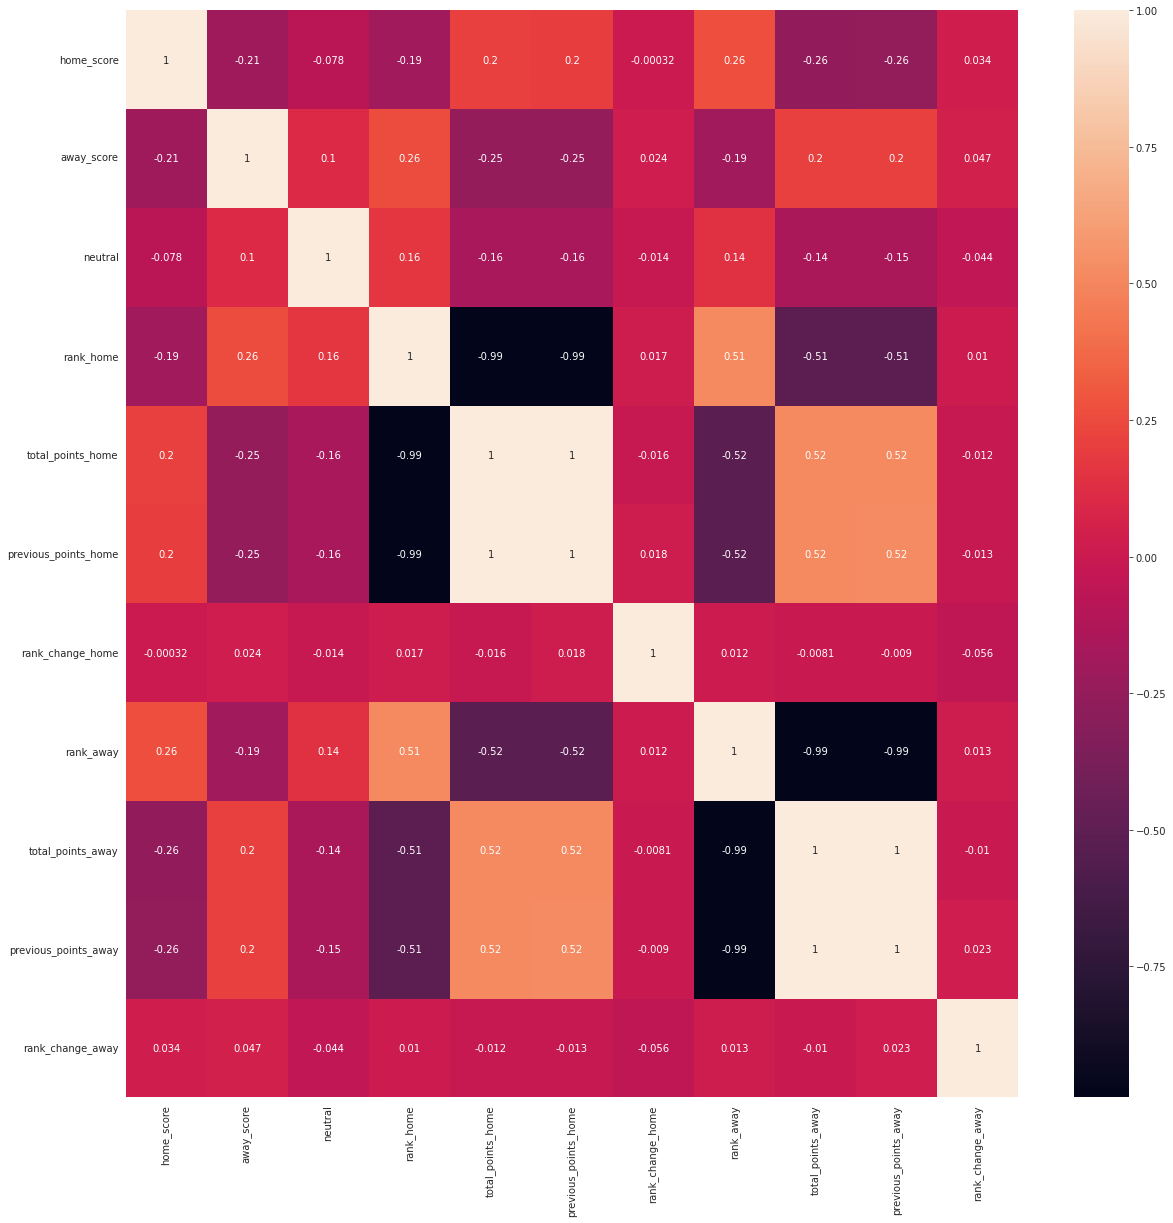

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = df.corr()
corr1
sns.heatmap(corr1,annot=True)

In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away'],
      dtype='object')

In [ ]:
# feature generation
df['rank_difference'] = df['rank_home'] - df['rank_away']
df['average_rank'] = (df['rank_home'] + df['rank_away'])/2
df['point_difference'] = df['total_points_home'] - df['total_points_away']
df['score_difference'] = df['home_score'] - df['away_score']
df['is_won'] = df['score_difference'] > 0
df['is_stake'] = df['tournament'] != 'Friendly'



# I tried earlier rest days but it did not turn to be useful


# I tried earlier the team as well but that did not make a difference either
df['wc_participant'] = df['home_team'] * df['home_team'].isin(world_cup.index.tolist())
df['wc_participant'] = df['wc_participant'].replace({'':'Other'})
df = df.join(pd.get_dummies(df['wc_participant']))

In [ ]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,2020-09-03,Germany,Spain,1.0,1.0,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
1,2020-09-03,Ukraine,Switzerland,2.0,1.0,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
2,2020-09-03,Russia,Serbia,3.0,1.0,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
3,2020-09-03,Turkey,Hungary,0.0,1.0,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0
4,2020-09-03,Bulgaria,Republic of Ireland,1.0,1.0,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won', 'is_stake', 'wc_participant', 'Argentina',
       'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'Costa Rica',
       'Croatia', 'Denmark', 'Ecuador', 'England', 'France', 'Germany',
       'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands', 'Other',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'United States',
       

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

In [ ]:
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], df['is_won']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7131979695431472
ROC Area under Curve = 0.7144668737060041
Cohen's Kappa = 0.4267799665250419
Time taken = 0.019678354263305664
              precision    recall  f1-score   support

       False    0.74872   0.69524   0.72099       210
        True    0.67839   0.73370   0.70496       184

    accuracy                        0.71320       394
   macro avg    0.71355   0.71447   0.71297       394
weighted avg    0.71588   0.71320   0.71350       394



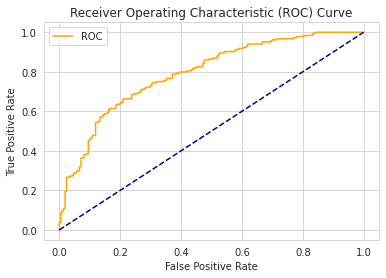

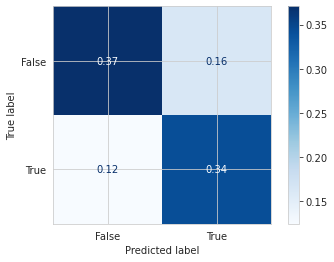

In [ ]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.616751269035533
ROC Area under Curve = 0.6165890269151139
Cohen's Kappa = 0.23247413370487913
Time taken = 0.011295795440673828
              precision    recall  f1-score   support

       False    0.64677   0.61905   0.63260       210
        True    0.58549   0.61413   0.59947       184

    accuracy                        0.61675       394
   macro avg    0.61613   0.61659   0.61604       394
weighted avg    0.61815   0.61675   0.61713       394



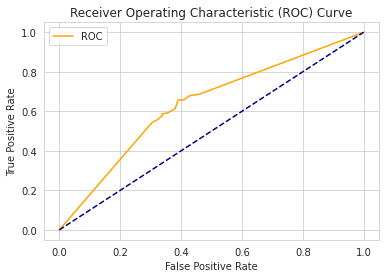

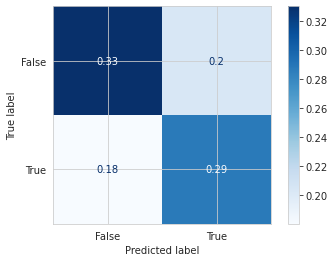

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.6878172588832487
ROC Area under Curve = 0.6879658385093167
Cohen's Kappa = 0.37479681089867645
Time taken = 4.293317556381226
              precision    recall  f1-score   support

       False    0.71642   0.68571   0.70073       210
        True    0.65803   0.69022   0.67374       184

    accuracy                        0.68782       394
   macro avg    0.68722   0.68797   0.68723       394
weighted avg    0.68915   0.68782   0.68813       394



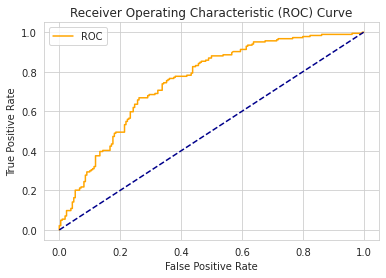

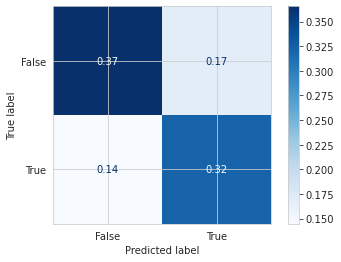

In [ ]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Accuracy = 0.7055837563451777
ROC Area under Curve = 0.7093426501035196
Cohen's Kappa = 0.41450166538560085
Time taken = 0.35449934005737305
              precision    recall  f1-score   support

       False    0.76111   0.65238   0.70256       210
        True    0.65888   0.76630   0.70854       184

    accuracy                        0.70558       394
   macro avg    0.70999   0.70934   0.70555       394
weighted avg    0.71337   0.70558   0.70536       394



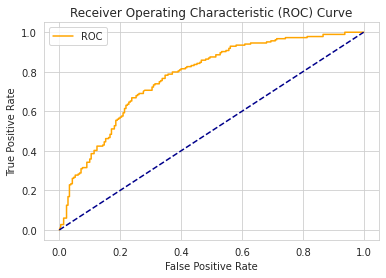

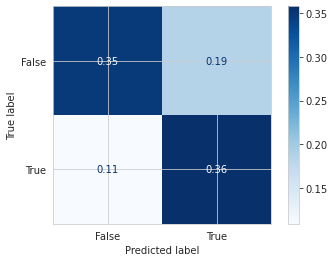

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.7131979695431472
ROC Area under Curve = 0.7148033126293996
Cohen's Kappa = 0.4271634800957258
Time taken = 0.18527793884277344
              precision    recall  f1-score   support

       False    0.75130   0.69048   0.71960       210
        True    0.67662   0.73913   0.70649       184

    accuracy                        0.71320       394
   macro avg    0.71396   0.71480   0.71305       394
weighted avg    0.71642   0.71320   0.71348       394



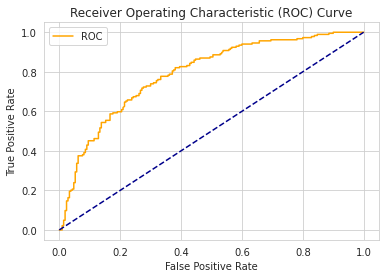

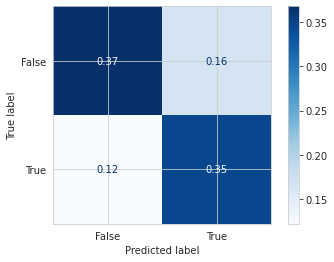

In [ ]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
         'max_depth': 16,
         'min_split_gain': 0.1,
         'n_estimators': 200,
         'num_leaves': 50,
         'reg_alpha': 1.2,
         'reg_lambda': 1.2,
         'subsample': 0.95,
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Accuracy = 0.6776649746192893
ROC Area under Curve = 0.6804606625258799
Cohen's Kappa = 0.3579109457205184
Time taken = 4.9304773807525635
              precision    recall  f1-score   support

       False    0.72432   0.63810   0.67848       210
        True    0.63636   0.72283   0.67684       184

    accuracy                        0.67766       394
   macro avg    0.68034   0.68046   0.67766       394
weighted avg    0.68325   0.67766   0.67772       394



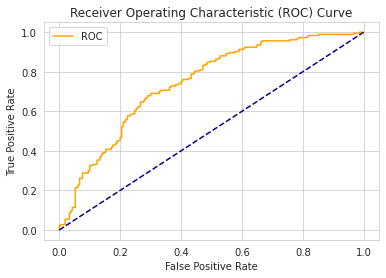

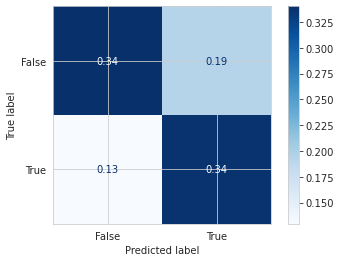

In [ ]:
import xgboost as xgb
params_xgb ={'n_estimators': 1000,
            'max_depth': 128}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [ ]:
rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2020-02-20,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
1,2020-02-21,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
2,2020-02-22,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
3,2020-02-23,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
4,2020-02-24,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC


In [ ]:
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rank.loc[(rank['rank_date'] == rank['rank_date'].max()) &
                                    rank['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])


In [ ]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob

        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group D:___
France vs. Denmark: France wins with 0.56
France vs. Tunisia: France wins with 0.77
France vs. Australia: France wins with 0.78
Denmark vs. Tunisia: Denmark wins with 0.65
Denmark vs. Australia: Denmark wins with 0.67
Tunisia vs. Australia: Australia wins with 0.55
___Starting group E:___
Spain vs. Germany: Draw
Spain vs. Japan: Spain wins with 0.65
Spain vs. Costa Rica: Spain wins with 0.72
Germany vs. Japan: Germany wins with 0.55
Germany vs. Costa Rica: Germany wins with 0.63
Japan vs. Costa Rica: Draw
___Starting group H:___
Portugal vs. Ghana: Portugal wins with 0.79
Portugal vs. Uruguay: Draw
Portugal vs. South Korea: Portugal wins with 0.63
Ghana vs. Uruguay: Uruguay wins with 0.84
Ghana vs. South Korea: South Korea wins with 0.74
Uruguay vs. South Korea: Uruguay wins with 0.58
___Starting group C:___
Argentina vs. Saudi Arabia: Argentina wins with 0.84
Argentina vs. Mexico: Argentina wins with 0.61
Argentina vs. Poland: Argentina wins with 0.74
Saudi Ara

In [ ]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away),
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model_lr.predict_proba(row)[:,1][0]
        if model_lr.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'],
                                                        1/home_win_prob,
                                                        world_cup_rankings.loc[away, 'country_abrv'],
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])

    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. United States: Netherlands wins with probability 0.52
Argentina vs. Denmark: Argentina wins with probability 0.58
Spain vs. Croatia: Spain wins with probability 0.53
Brazil vs. Portugal: Brazil wins with probability 0.67
Senegal vs. England: England wins with probability 0.77
Mexico vs. France: France wins with probability 0.73
Germany vs. Belgium: Belgium wins with probability 0.79
Switzerland vs. Uruguay: Uruguay wins with probability 0.58


___Starting of the quarterfinal___
Netherlands vs. Argentina: Argentina wins with probability 0.69
Spain vs. Brazil: Brazil wins with probability 0.75
England vs. France: France wins with probability 0.63
Belgium vs. Uruguay: Belgium wins with probability 0.68


___Starting of the semifinal___
Argentina vs. Brazil: Brazil wins with probability 0.68
France vs. Belgium: Belgium wins with probability 0.66


___Starting of the final___
Brazil vs. Belgium: Belgium wins with probability 0.54




In [ ]:
next_round_wc = world_cup.groupby('Group').nth([0, 1])
teams_through = next_round_wc['Team']


In [ ]:
teams_through

Group
A      Netherlands
A          Senegal
B          England
B    United States
C        Argentina
C           Mexico
D           France
D          Denmark
E            Spain
E          Germany
F          Belgium
F          Croatia
G           Brazil
G      Switzerland
H          Uruguay
H         Portugal
Name: Team, dtype: object

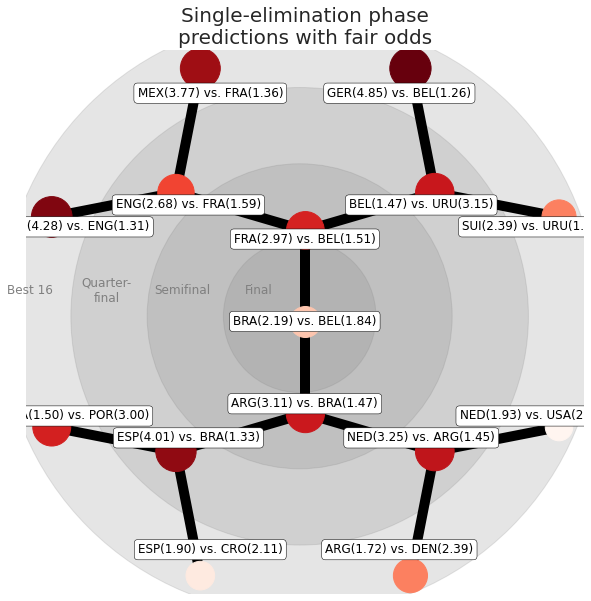

In [ ]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
# add circles
circle_positions = [(235, 'blue'), (180, 'yellow'), (120, 'red'), (60, 'Green')]
[ax.add_artist(plt.Circle((centre, centre),
                          cp, color='grey',
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos,
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor),
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000,
        alpha=1,
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G,
                        pos=shifted_pos,
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t,
          fontsize=12, color='grey',
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()
